In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv(r"C:\data_science_udemy\DATA\height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight (pounds)')

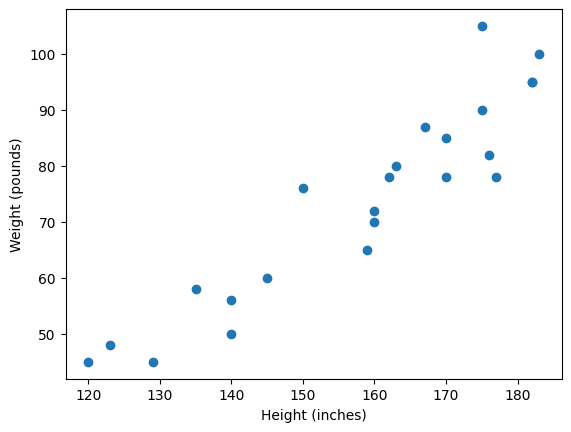

In [4]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')

In [5]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


<Figure size 800x600 with 0 Axes>

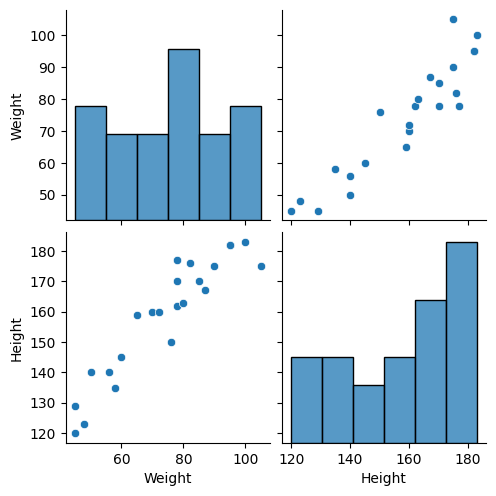

In [6]:
import seaborn as sns
plt.figure(figsize = (8,6))
sns.pairplot(data = df)


In [7]:
# createind or separating the data into dependent and independent variables
X = df[['Weight']]#the independent variable should alway be 2d that is a dataframe so use [[]]
y = df['Height']# the dependent variable can be a series

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


(18, 1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)  # Don't fit again, just transform the test set

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [18]:
print("Model Coefficients:", model.coef_) # This will print the slope of the regression line that is the weight coefficient
print("Model Intercept:", model.intercept_) # This will print the intercept of the regression line

Model Coefficients: [17.03440872]
Model Intercept: 157.5


Text(0, 0.5, 'Height')

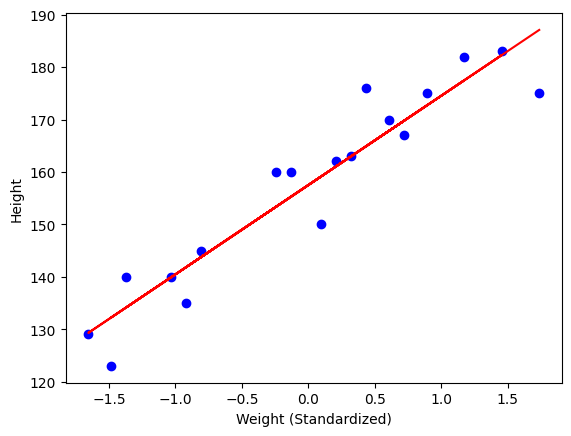

In [22]:
#plot training data best fit line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train,model.predict(X_train), color='red', label='Best Fit Line')
plt.xlabel('Weight (Standardized)')
plt.ylabel('Height')

In [23]:
# prediction on test data
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("R^2 Score:", r2_score(y_test,y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error: 109.77592599051664
R^2 Score: 0.776986986042344
Mean Absolute Error: 9.822657814519232
Root Mean Squared Error: 10.477400726827081
